<a href="https://colab.research.google.com/github/deepacu1986/DATA-SCIENCE-ASSIGNMENTS/blob/main/timeseriesassignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS
Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.
Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.
Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
Part 3: Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.
Part 4: Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.
Deliverables:
•	Include visualizations and explanations for the choices and findings at each step.
•	Well-commented Python code that used to conduct the analysis and build the models.
Assessment Criteria:
•	Accuracy and completeness of the data preparation and exploration steps.
•	Justification for model selection and parameter tuning decisions.
•	Clarity and depth of the analysis in the diagnostics and model evaluation stages.
This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.


Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


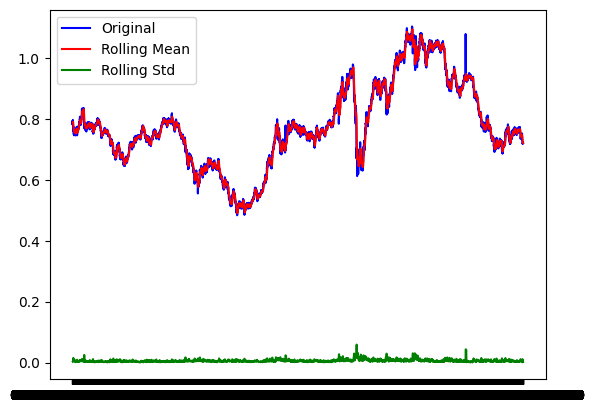

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Data Loading
df = pd.read_csv('/content/exchange_rate.csv', index_col='date', parse_dates=True)
ts = df.iloc[:, 0]  # Assuming the second column is USD to AUD
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)
test_stationarity(ts)

In [ ]:
df.columns

Index(['Ex_rate'], dtype='object')

In [ ]:
df['Ex_rate']= df['Ex_rate']-df['Ex_rate'].shift(36)

In [ ]:
df

,Ex_rate
date,
12-02-1990 00:00,NaN
13-02-1990 00:00,NaN
14-02-1990 00:00,NaN
15-02-1990 00:00,NaN
16-02-1990 00:00,NaN
...,...
06-10-2010 00:00,-0.003592
07-10-2010 00:00,-0.005306
08-10-2010 00:00,-0.015367


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Ex_rate
date,
20-03-1990 00:00,-0.056700
21-03-1990 00:00,-0.040500
22-03-1990 00:00,-0.024900
23-03-1990 00:00,-0.007200
24-03-1990 00:00,0.004700
...,...
06-10-2010 00:00,-0.003592
07-10-2010 00:00,-0.005306
08-10-2010 00:00,-0.015367


Results of Dickey-Fuller Test :

Test Statistic                  -20.460899
p-value                           0.000000
#Lags Used                       36.000000
Number of Observations Used    7473.000000
Critical Value (1%)              -3.431225
Critical Value (5%)              -2.861927
Critical Value (10%)             -2.566976
dtype: float64


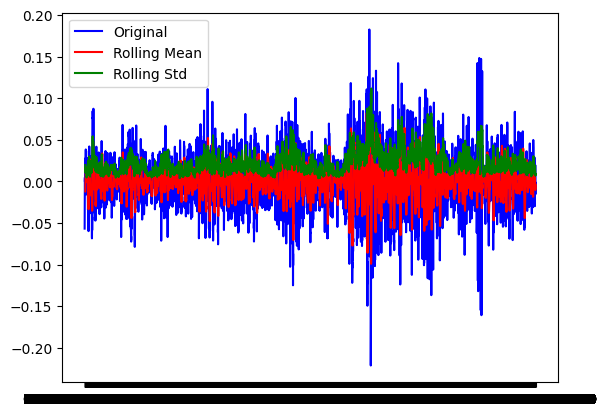

In [ ]:
test_stationarity(df['Ex_rate'])

In [ ]:
import statsmodels.tsa.api as smt

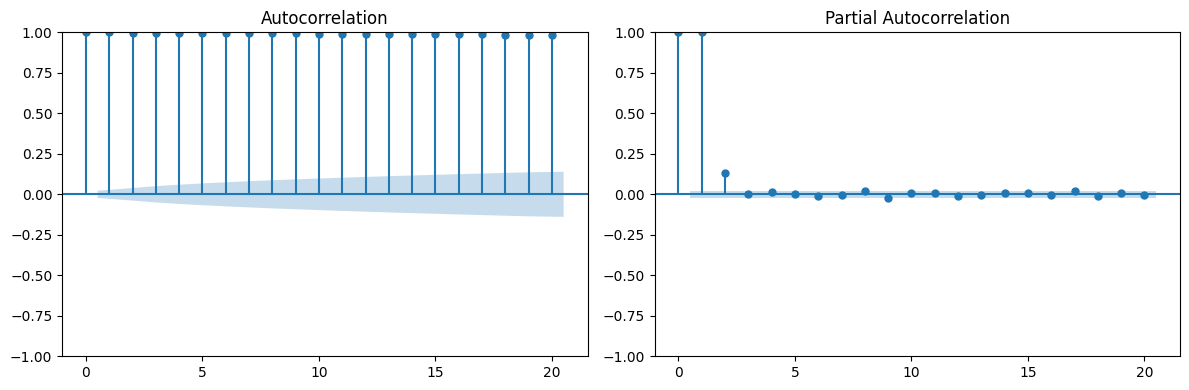

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts, lags=20, ax=axes[0])
smt.graphics.plot_pacf(ts, lags=20, ax=axes[1])
plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(ts,order=(2,1,1))

In [ ]:
df.columns

Index(['Ex_rate'], dtype='object')

In [ ]:
result= model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
df['predicted']=result.predict()

In [ ]:
pred_date=[df.index[-1]+ DateOffset(months=x)for x in range(0,20)]
pred_date_air=pd.DataFrame(index=pred_date[1:])
pred_date_air
data=pd.concat([df,pred_date_air])
data['forecast'] = result.forecast(start = 0, end = 7800,dynamic=False)
data[['#Passengers', 'forecast']].plot(figsize=(12, 8))

TypeError: can only concatenate str (not "DateOffset") to str

In [ ]:
from pandas.tseries.offsets import DateOffset

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

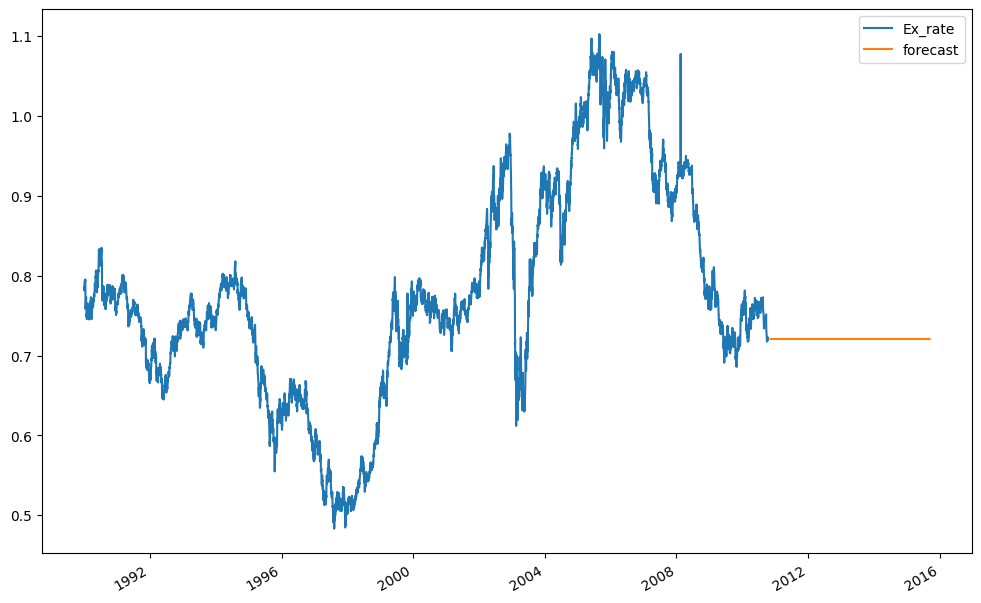

In [ ]:
pred_date=[pd.to_datetime(df.index[-1]) + DateOffset(months=x) for x in range(0,60)]
pred_date_air=pd.DataFrame(index=pred_date[1:])
data=pd.concat([df,pred_date_air])
data.index = pd.to_datetime(data.index, format='%d-%m-%Y %H:%M') # Specify the format
data.index = data.index.tz_localize(None) # Remove potential timezone information that might cause issues
forecast_steps = len(pred_date_air)
forecast_result = model_arima_fit.forecast(steps=forecast_steps)
forecast_series = pd.Series(forecast_result.values, index=pred_date_air.index)
data['forecast'] = forecast_series
data[['Ex_rate','forecast']].plot(figsize=(12, 8))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipython-input-72-1437812721.py:19: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  original_da

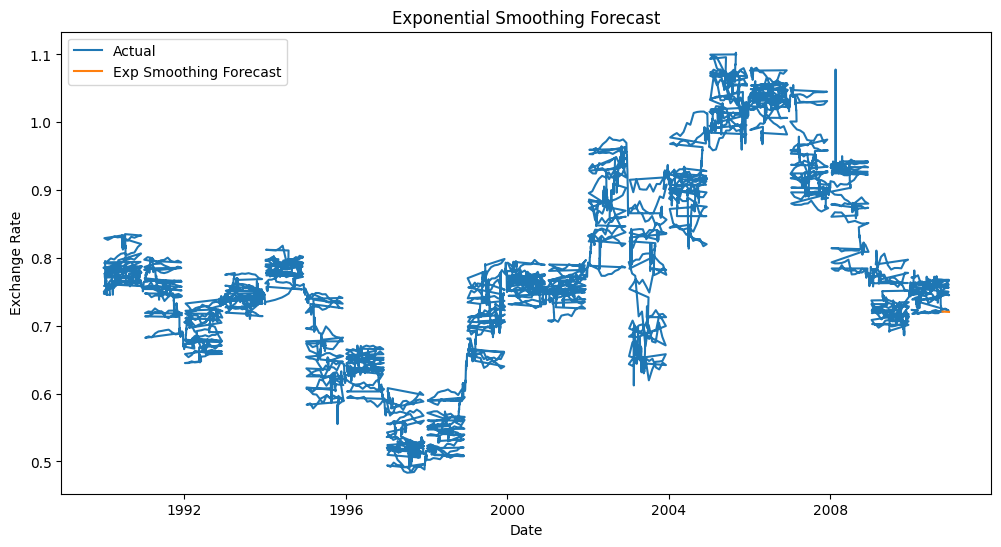

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.dates as mdates
import datetime
import pandas as pd

# Step 1: Choose model (assuming trend but no seasonality)
model_es = ExponentialSmoothing(ts, trend='add', seasonal=None)
model_es_fit = model_es.fit()

# Step 2: Forecasting
forecast_steps = 59 # Use the same forecast steps as ARIMA for consistency
forecast_es = model_es_fit.forecast(steps=forecast_steps)

# Generate future dates as standard Python datetime objects
last_date = pd.to_datetime(ts.index[-1]) # Convert the last date to a datetime object
future_dates = [last_date + datetime.timedelta(days=x) for x in range(1, forecast_steps + 1)]

# Convert original index to list of datetime objects
original_dates = [pd.to_datetime(date) for date in ts.index]

plt.figure(figsize=(12, 6))
plt.plot(original_dates, ts, label='Actual')
plt.plot(future_dates, forecast_es, label='Exp Smoothing Forecast')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')

# Explicitly set date formatters and locators
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))

plt.show()

In [ ]:
# Simulate train-test split
train_size = int(len(ts) * 0.85)
train, test = ts[:train_size], ts[train_size:]

# Refit models on training data
model_arima = ARIMA(train, order=(1, 1, 1)).fit()
pred_arima = model_arima.forecast(steps=len(test))

model_es = ExponentialSmoothing(train, trend='add').fit()
pred_es = model_es.forecast(steps=len(test))

# Metrics
def compute_metrics(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    return mae, rmse, mape

mae_arima, rmse_arima, mape_arima = compute_metrics(test, pred_arima)
mae_es, rmse_es, mape_es = compute_metrics(test, pred_es)

print(f"ARIMA - MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}, MAPE: {mape_arima:.2f}%")
print(f"Exp Smoothing - MAE: {mae_es:.4f}, RMSE: {rmse_es:.4f}, MAPE: {mape_es:.2f}%")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA - MAE: 0.1279, RMSE: 0.1498, MAPE: nan%
Exp Smoothing - MAE: 0.1386, RMSE: 0.1624, MAPE: nan%


In [ ]:
df.isnull().sum()

,0
Ex_rate,0
predicted,0
forcast,7510


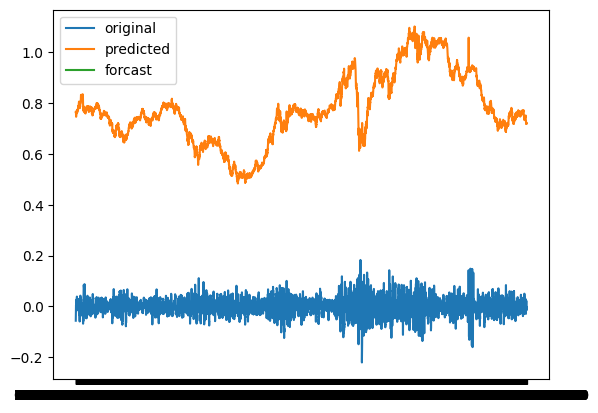

In [ ]:
plt.plot(df['Ex_rate'],label='original')
plt.plot(df['predicted'],label='predicted')
plt.plot(df['forcast'],label='forcast')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(data['Ex_rate'],data['predicted'])

ValueError: Input contains NaN.

In [ ]:
data.isnull().sum()

,0
Ex_rate,59
predicted,59
forcast,7569
forecast,7569


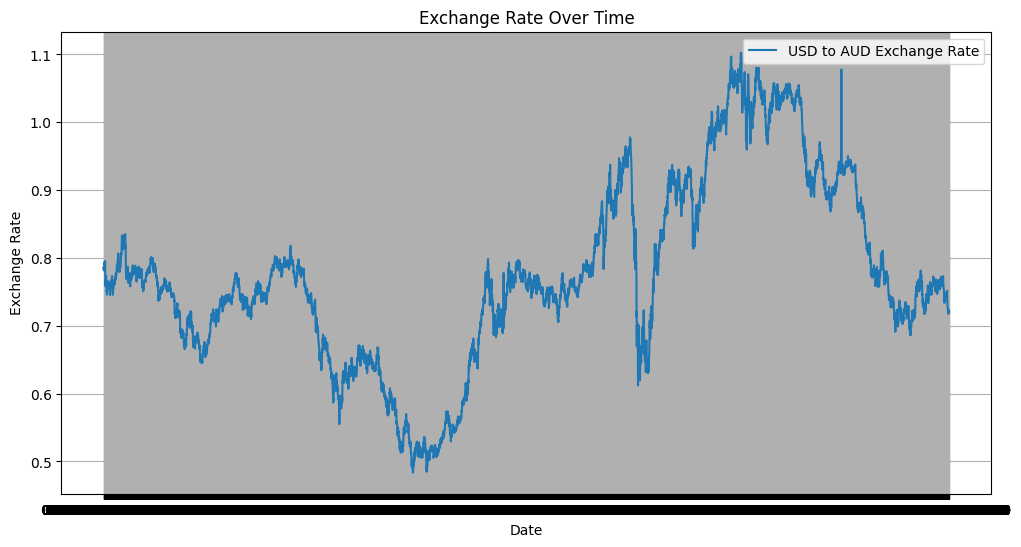

Missing values: 0
ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Data Loading
df = pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=True)
ts = df.iloc[:, 0]  # Assuming the second column is USD to AUD

# 2. Initial Exploration
plt.figure(figsize=(12, 6))
plt.plot(ts, label='USD to AUD Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# 3. Data Preprocessing
print("Missing values:", ts.isnull().sum())

# Handle missing values with forward-fill
ts = ts.ffill()

# ADF Test for stationarity
result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])



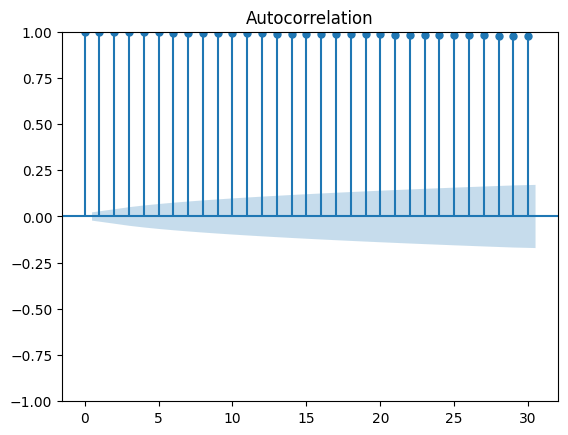

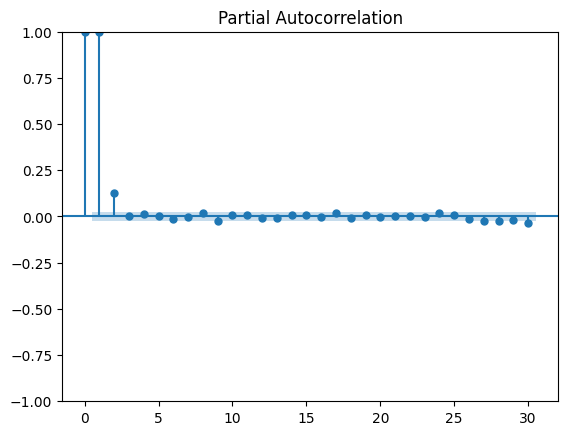

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 08 Jul 2025   AIC                         -56102.322
Time:                        09:00:45   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

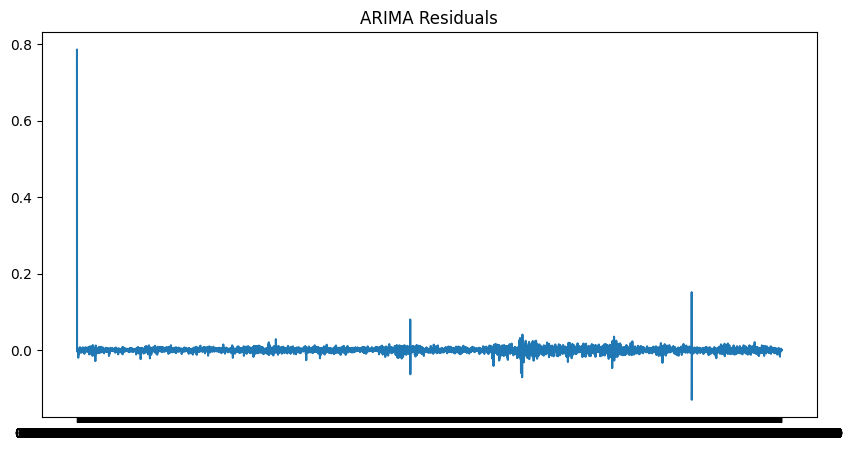

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipython-input-61-2375525651.py:31: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(pd.date_range(ts.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast_arima, label='ARIMA Forecast')


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x7b42ddace690>.

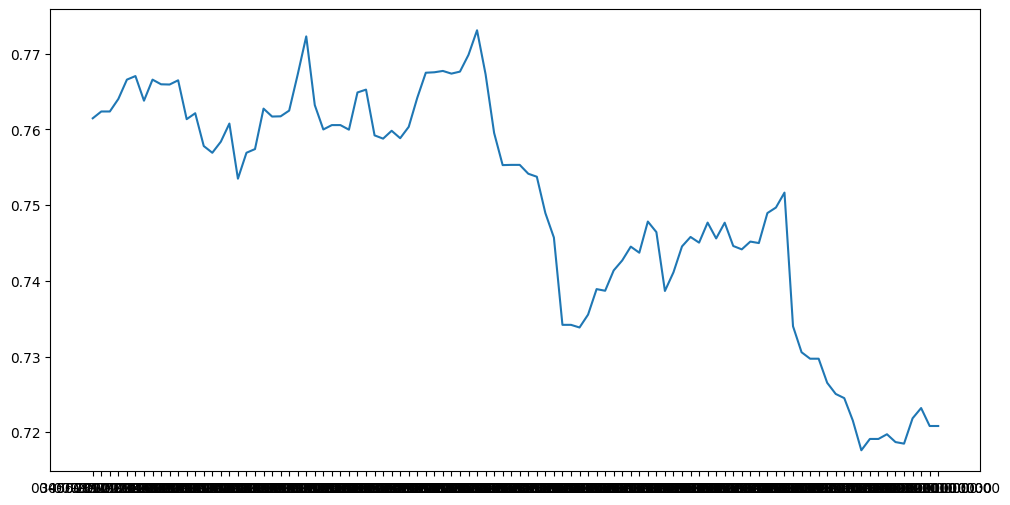

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Plot ACF and PACF
plot_acf(ts, lags=30)
plot_pacf(ts, lags=30)
plt.show()

# Step 2: Differencing if non-stationary
ts_diff = ts.diff().dropna()

# Step 3: Fit ARIMA model (example: ARIMA(1,1,1))
model_arima = ARIMA(ts, order=(1, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

# Step 4: Residual Diagnostics
residuals = model_arima_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title("ARIMA Residuals")
plt.show()

# Step 5: Forecasting
forecast_steps = 30
forecast_arima = model_arima_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(ts[-100:], label='Actual')
plt.plot(pd.date_range(ts.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()
